# creating and loading the data

# THESE COMMANDS ONLY WORK IN CLOUDERA VM

In [10]:
'''
launch the spark session in cloudera using the below command

pyspark --packages com.databricks:spark-avro_2.10:2.0.1

'''
# loading the data and assigning the schema.

path_text_orders="/user/pruthviraj/sqoop_text/orders"

orders_text=sqlContext.read.format("text").load(path_text_orders)

orders_table=orders_text.selectExpr("cast(split(value,',') [0] as int) order_customer_id",
                                     "cast(split(value,',') [1] as date) order_date",
                                     "cast(split(value,',') [2] as int) order_id",
                                      "cast(split(value,',') [3] as string) order_status")

orders_table.count()

68883

# text write

In [ ]:
# writing without compression of text

from pyspark.sql import functions as f

orders_table.select(f.concat_ws(",","order_customer_id","order_date","order_id","order_status")).\
                    write.format("text").save("/user/pruthviraj/text")
import os
os.system("hdfs dfs -ls /user/pruthviraj/text")

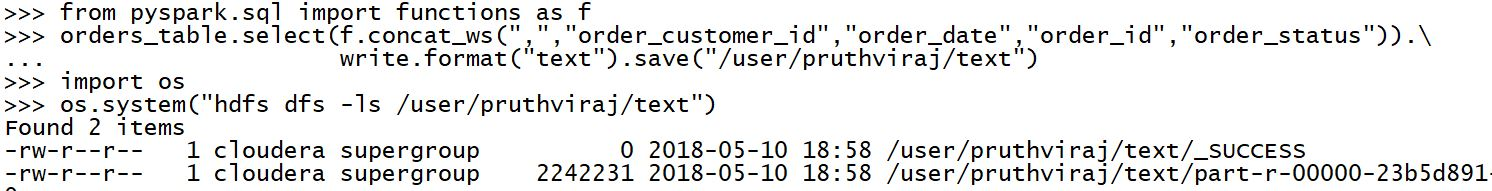

In [ ]:
# writing with compression of text

from pyspark.sql import functions as f

orders_table.select(f.concat_ws(",","order_customer_id","order_date","order_id","order_status")).\
                   rdd.saveAsTextFile("/user/pruthviraj/text_compress","org.apache.hadoop.io.compress.GzipCodec")
import os
os.system("hdfs dfs -ls /user/pruthviraj/text_compress")    

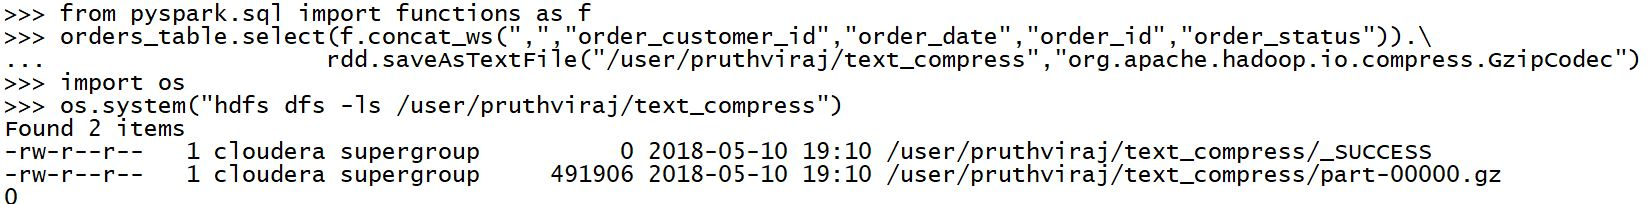

# write Json

In [ ]:
# write json without compression

orders_table.write.format('json').save("/user/pruthviraj/json")

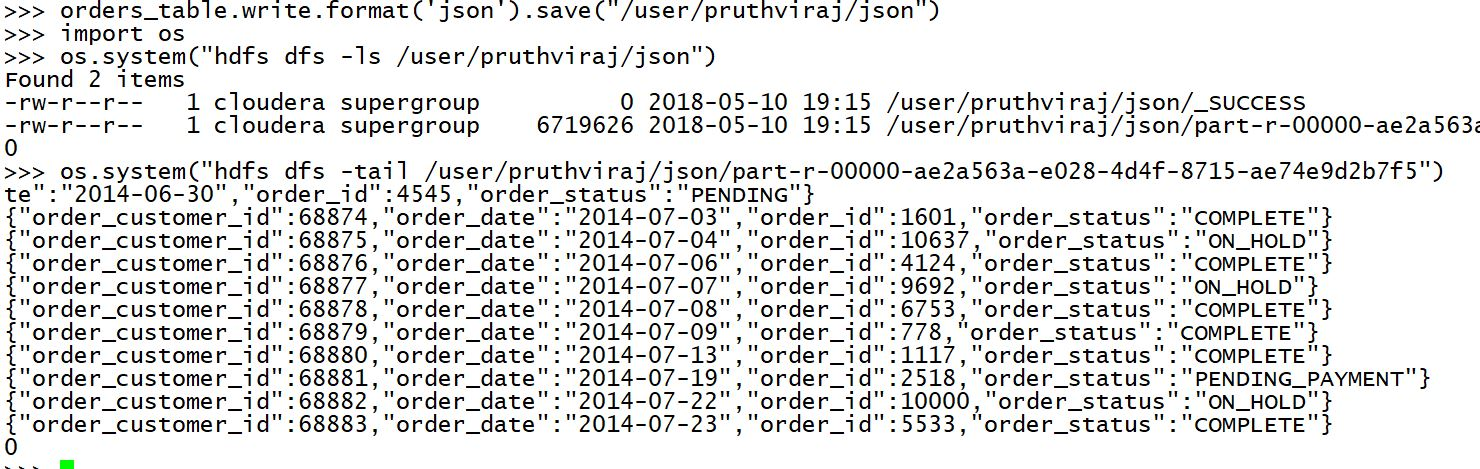

In [ ]:
# writing json with compression

orders_table.toJSON().saveAsTextFile("/user/pruthviraj/json_compress",\
                                     "org.apache.hadoop.io.compress.GzipCodec")

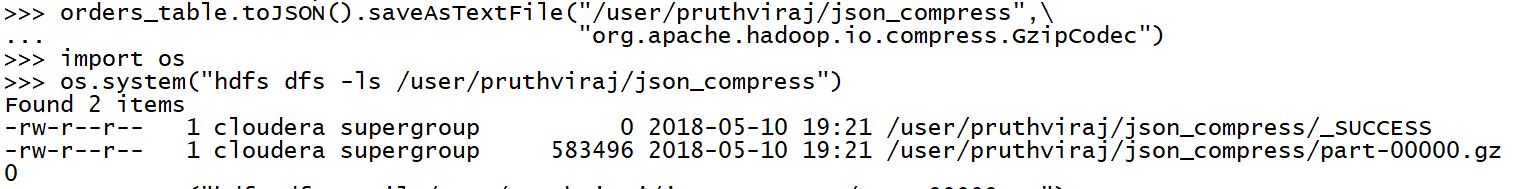

# Write Parquet

In [ ]:
# write parquet without compression

orders_table.write.format('parquet').save("/user/pruthviraj/parquet")

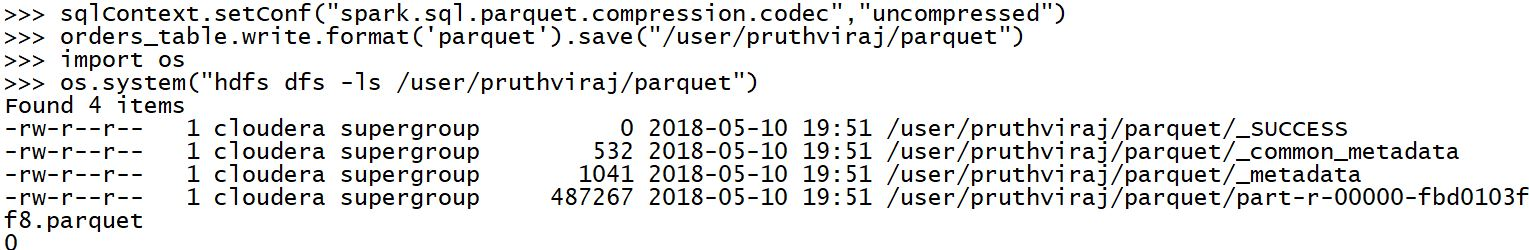

In [ ]:
# write parquet with compression

# sqlContext.setConf("spark.sql.parquet.compression.codec","{gzip,snappy,uncompressed}")

sqlContext.setConf("spark.sql.parquet.compression.codec","gzip")

orders_table.write.format('parquet').save("/user/pruthviraj/parquet_compress")

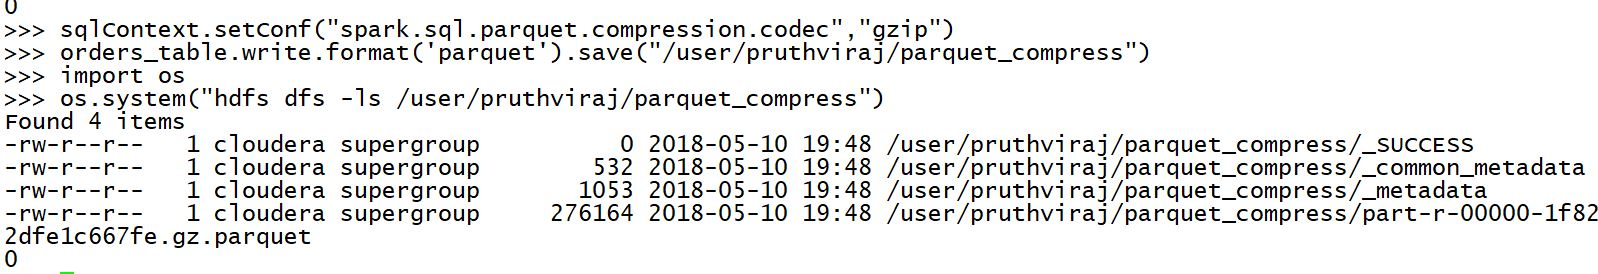

# write avro

## you may not see the compression extension but if you compare the size you will realize that compression has been applied

In [ ]:
## writing avro without compression

# avro format did not recognize the date format so we have reloaded the data

path_text_orders="/user/pruthviraj/sqoop_text/orders"

orders_text=sqlContext.read.format("text").load(path_text_orders)

orders_table=orders_text.selectExpr("cast(split(value,',') [0] as int) order_customer_id",
                                     "cast(split(value,',') [1] as string) order_date",
                                     "cast(split(value,',') [2] as int) order_id",
                                      "cast(split(value,',') [3] as string) order_status")

orders_table.write.format("com.databricks.spark.avro").save("/user/pruthviraj/avro")

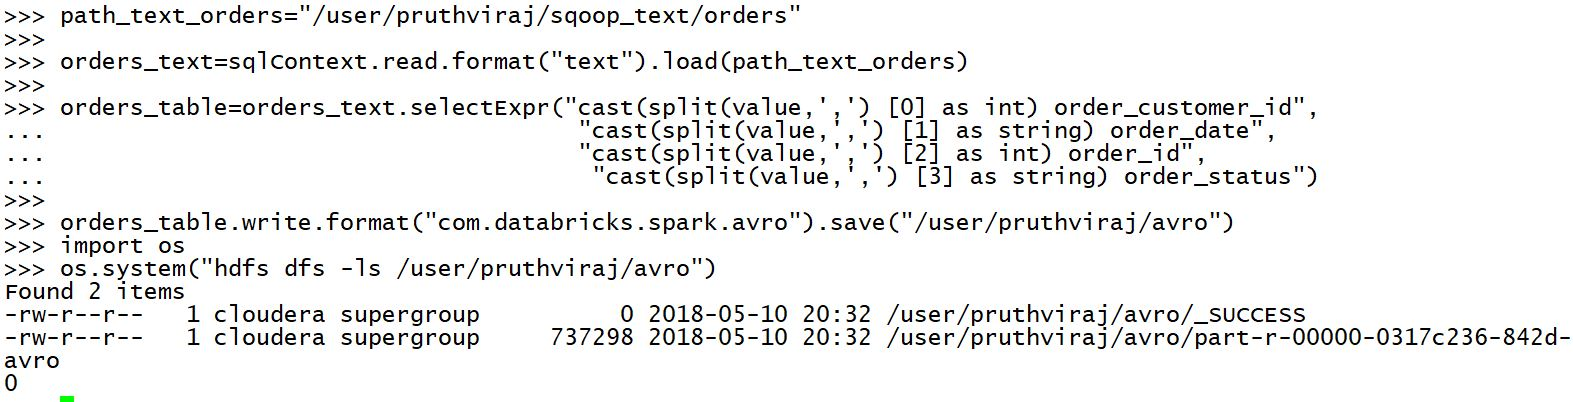

In [ ]:
# writing avro with compression

'''there is problem with cloudera vms. it wont execute snapyy compression and 
you will an error saying its not installed'''

#sqlContext.setConf("spark.sql.avro.compression.codec",{deflate,uncompressed,snappy})

sqlContext.setConf("spark.sql.avro.compression.codec","deflate")

path_text_orders="/user/pruthviraj/sqoop_text/orders"

orders_text=sqlContext.read.format("text").load(path_text_orders)

orders_table=orders_text.selectExpr("cast(split(value,',') [0] as int) order_customer_id",
                                     "cast(split(value,',') [1] as string) order_date",
                                     "cast(split(value,',') [2] as int) order_id",
                                      "cast(split(value,',') [3] as string) order_status")

orders_table.write.format("com.databricks.spark.avro").save("/user/pruthviraj/avro_compress")


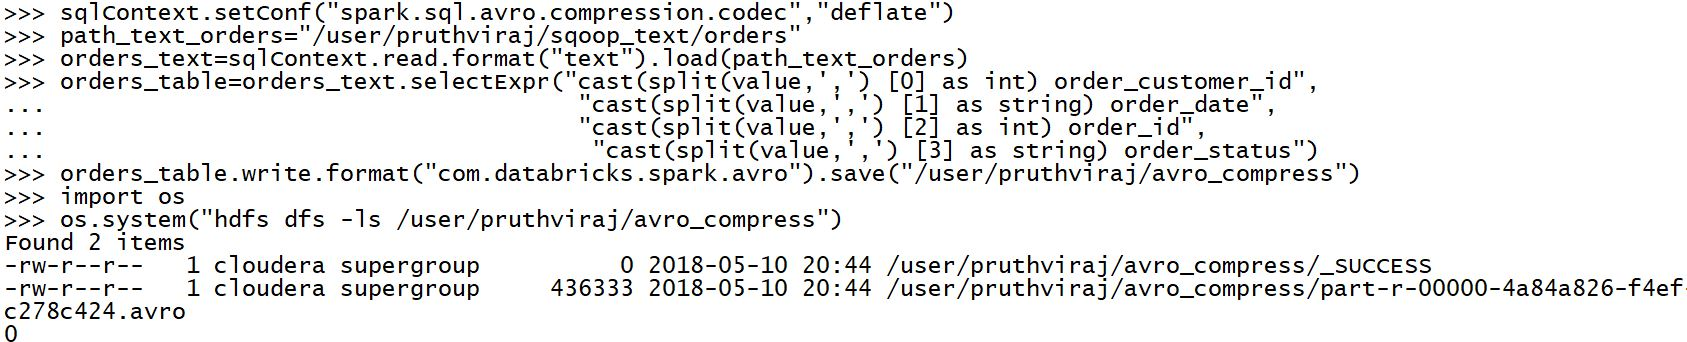